In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

In [2]:
data = pd.read_excel('data_laba.xls', header = 0)
data = data['Приросты']

In [3]:
data = data[:276]

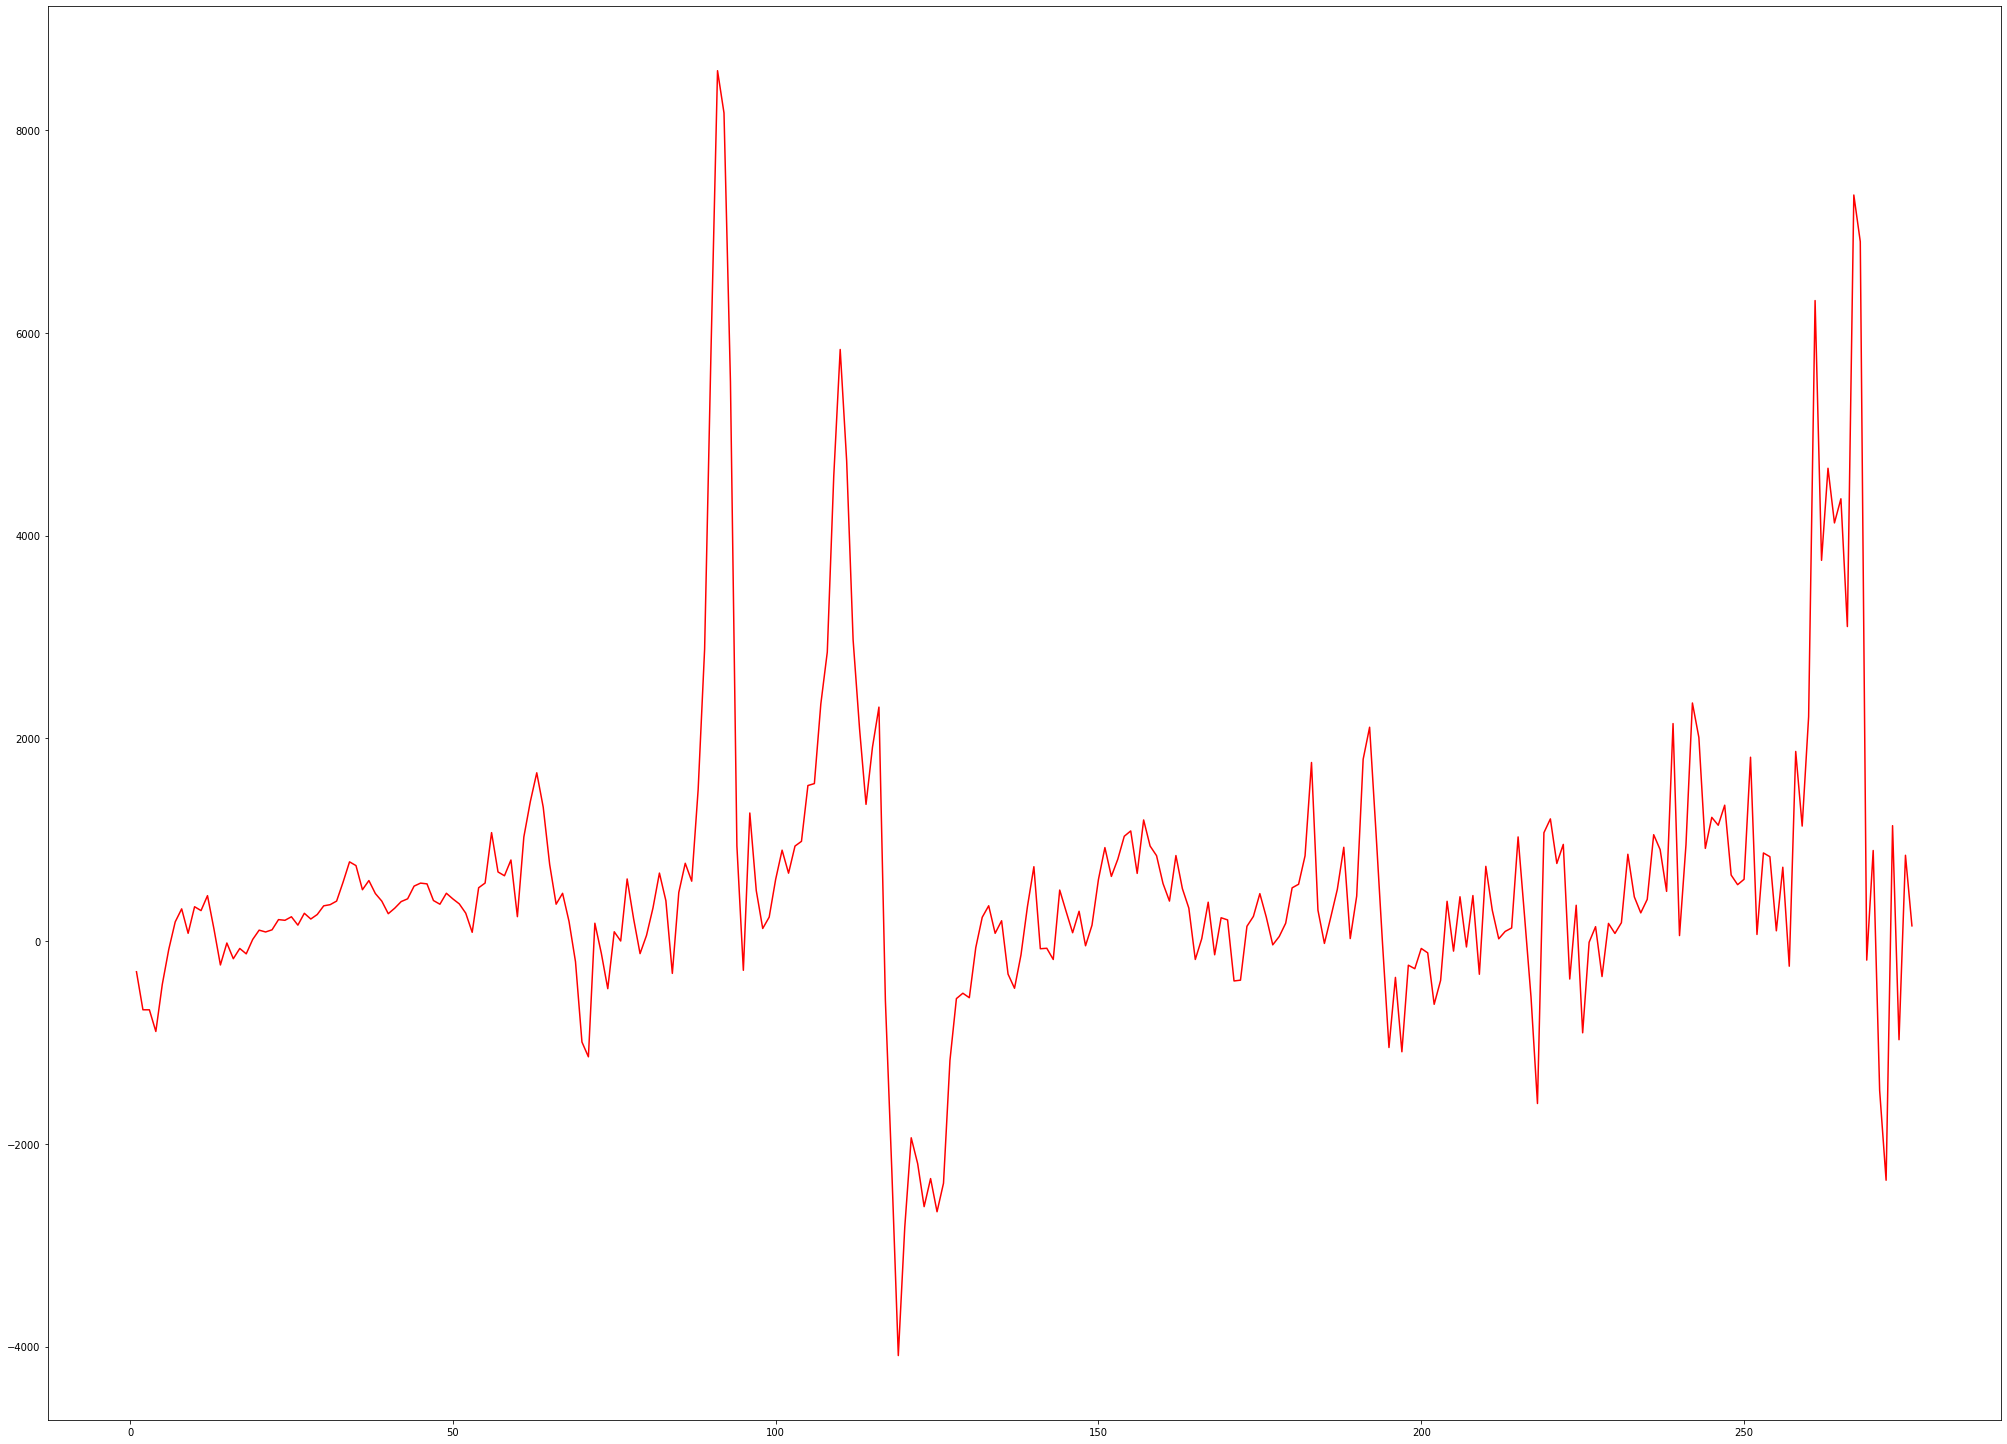

In [162]:
plt.rcParams['figure.figsize'] = 35, 26 
plt.plot(data, color = 'red')

In [5]:
data = data.dropna()
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as stat
def adf(ts):
	dftest = stat.adfuller(ts)
	dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
	if dftest[1] > 0.05:
		print("Process is non-stationary")
	else:
		print("Process is stationary")
adf(data)

Process is stationary


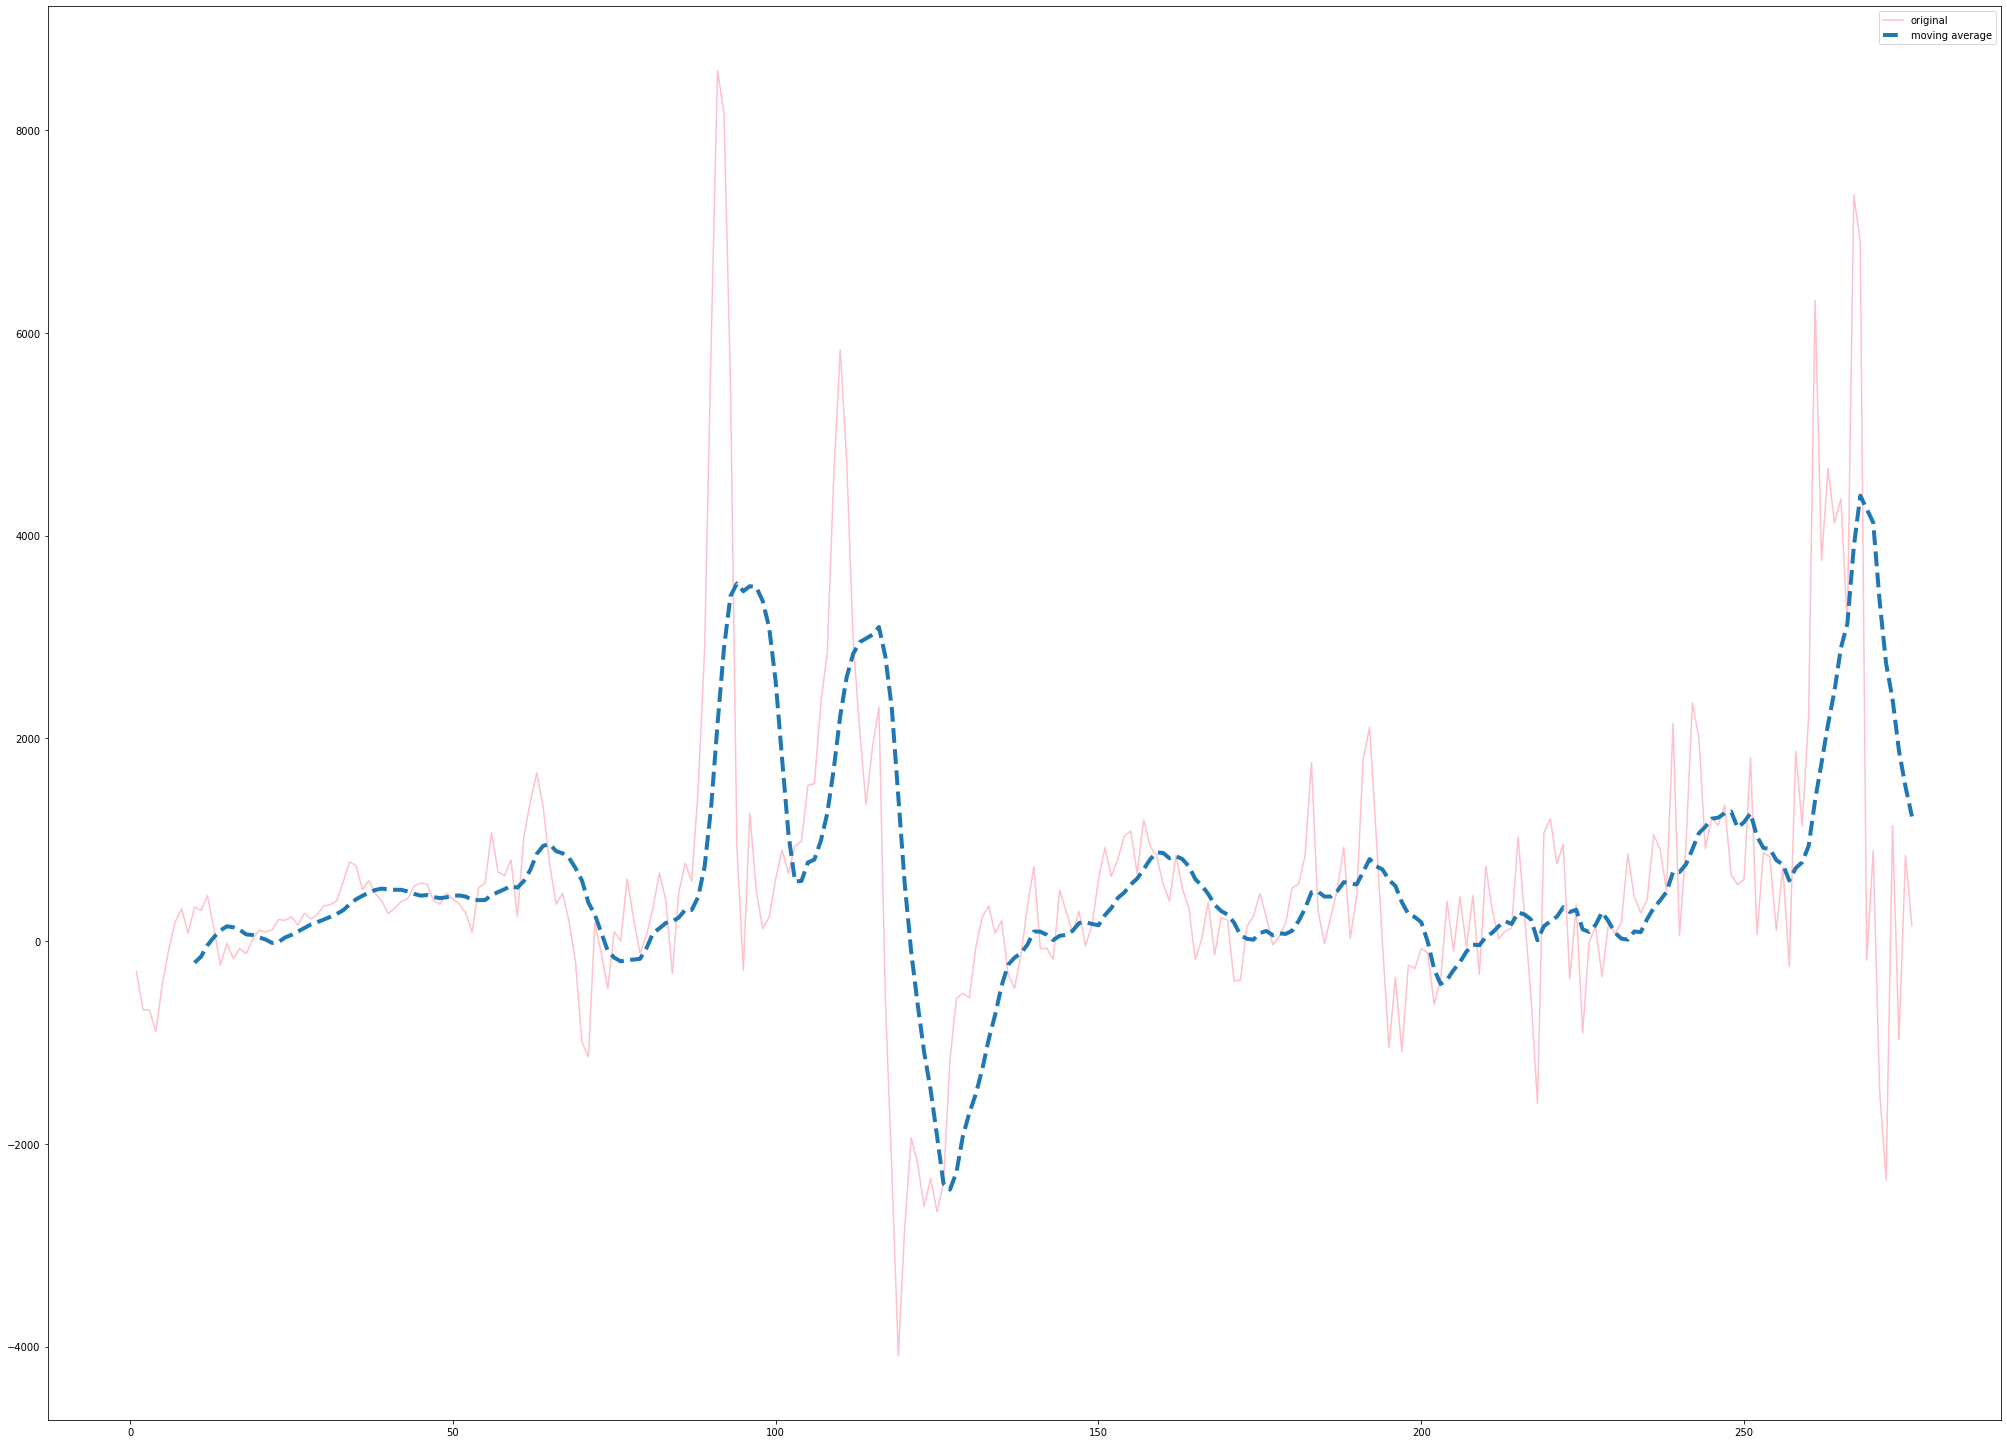

In [164]:
rw = data.rolling(window = 10).mean()
orig = plt.plot(data, label = 'original', color = 'pink')
rmean = plt.plot(rw, label = 'moving average', linestyle='dashed', linewidth = 4)
plt.legend(loc='best')
plt.show(block=True)

<BarContainer object of 25 artists>

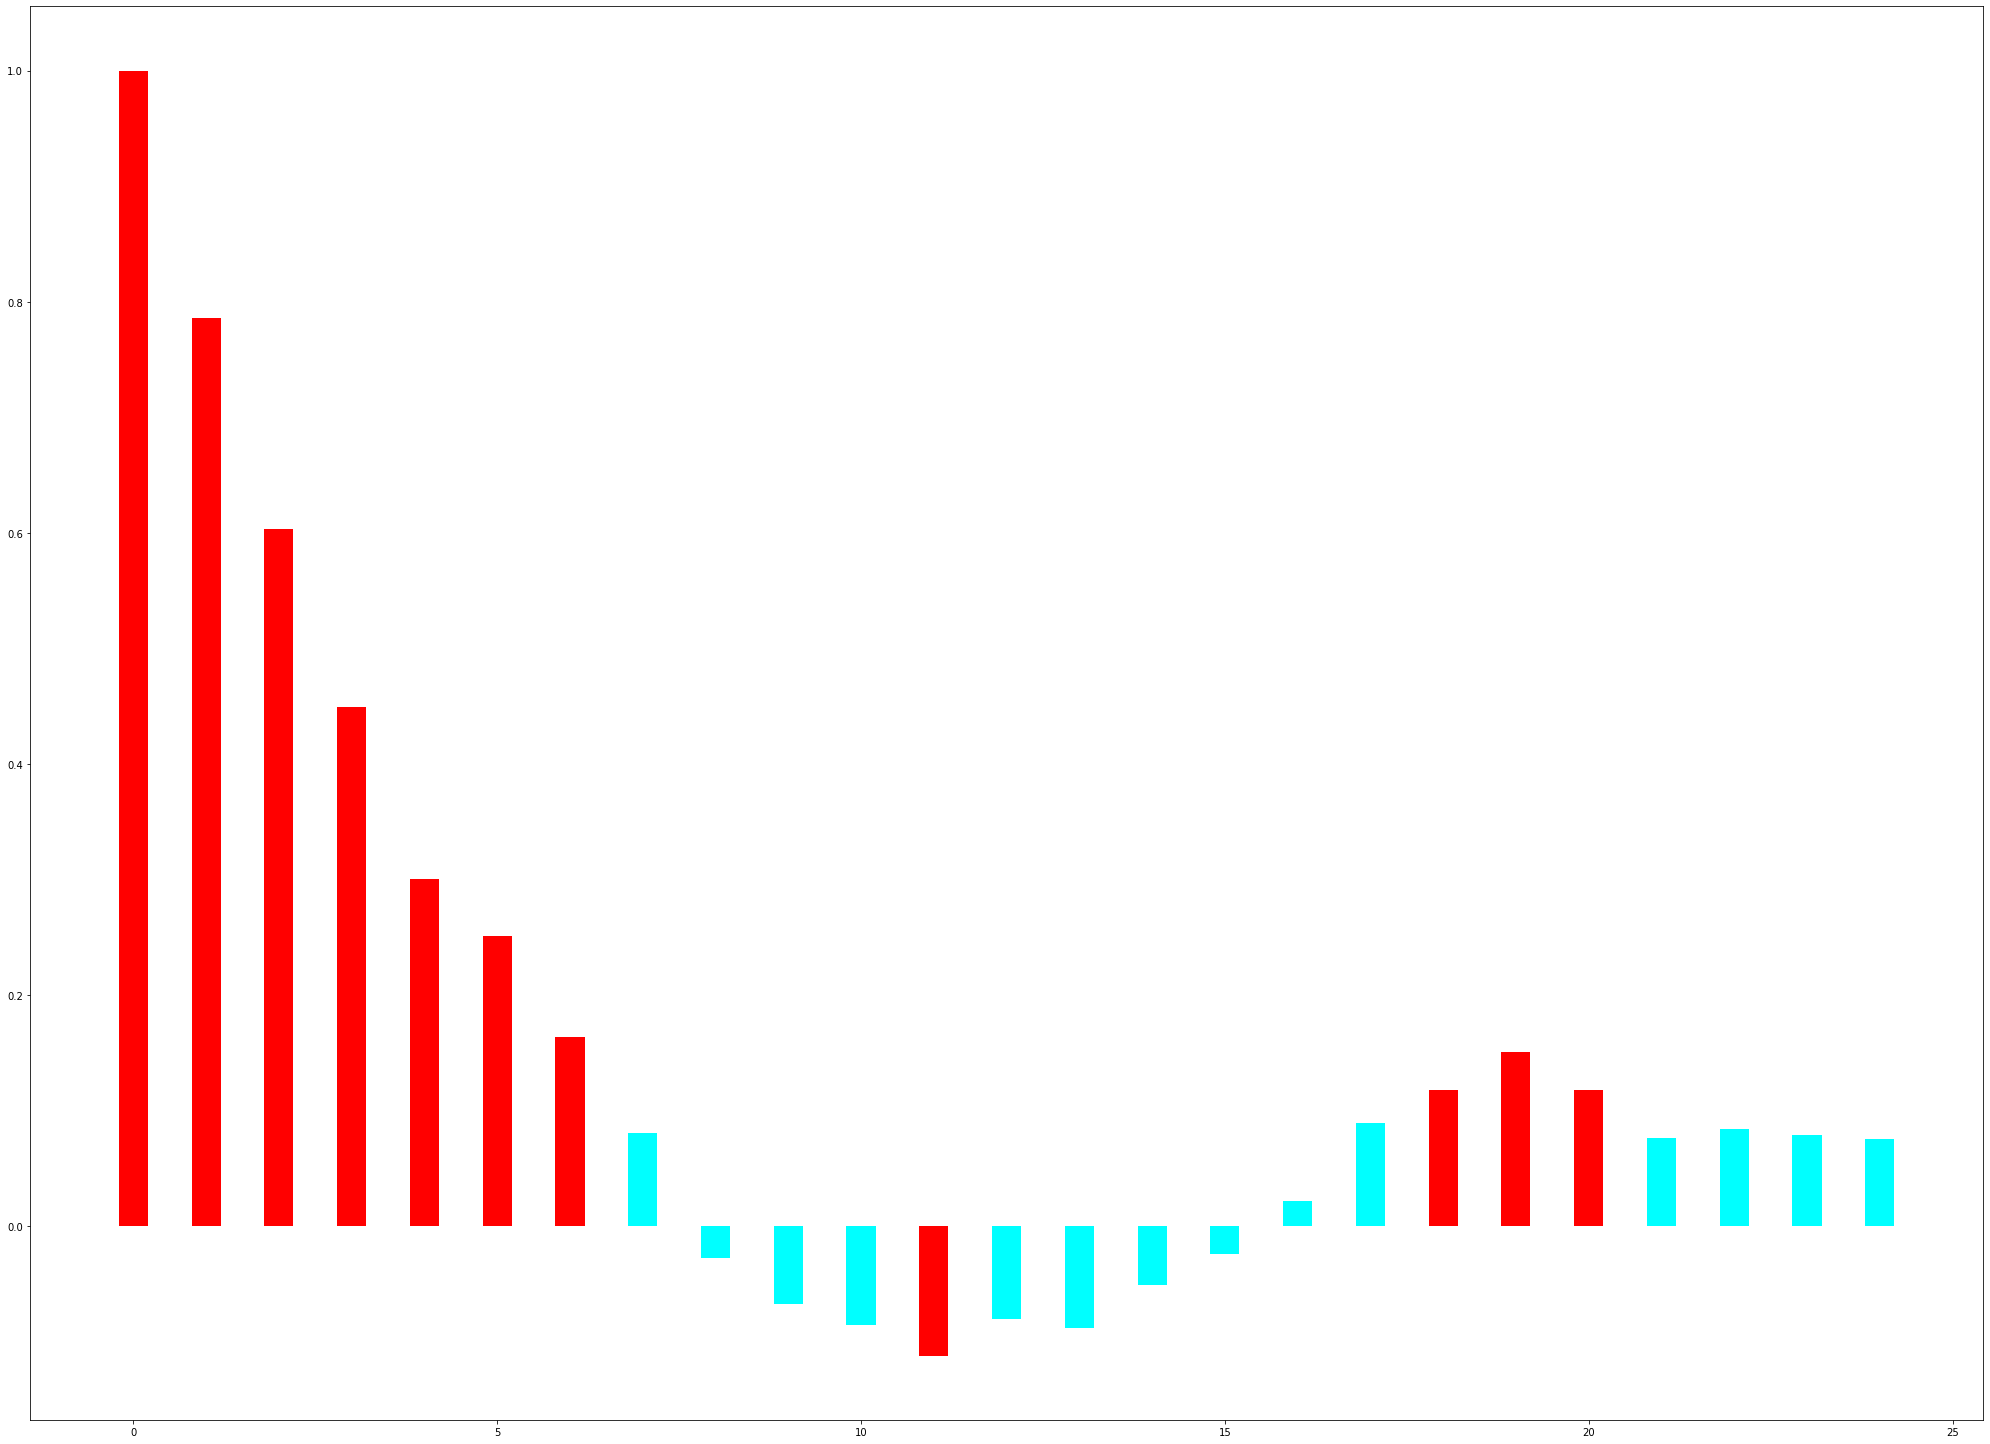

In [177]:
import statsmodels.api as sm

l_acf = sm.tsa.acf(data)
l_pacf = sm.tsa.pacf(data)

plt.bar([i for i in range(25)], l_acf, width = 0.4, color = ['red' if l_acf[i] > 0.1 or l_acf[i] < -0.1 else 'cyan' for i in range(25) ])


In [178]:
rw = rw.dropna()
df = pd.DataFrame()
temp = [11, 18, 19, 20]
temp.extend([i for i in range(7)])
for i in sorted(temp):
    df['t-'+str(i)] = rw.shift(i)
df = df.dropna()
df = df.rename(columns = {'t-0':'t'})
df.head(35)

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-11,t-18,t-19,t-20
30,212.360,188.375,163.770,129.420,94.705,61.600,35.725,60.350,-39.975,-152.533,-212.850
31,239.290,212.360,188.375,163.770,129.420,94.705,61.600,37.250,39.793,-39.975,-152.533
32,267.625,239.290,212.360,188.375,163.770,129.420,94.705,16.160,105.375,39.793,-39.975
33,304.540,267.625,239.290,212.360,188.375,163.770,129.420,-17.525,146.150,105.375,39.793
34,362.175,304.540,267.625,239.290,212.360,188.375,163.770,-8.333,137.020,146.150,105.375
35,412.650,362.175,304.540,267.625,239.290,212.360,188.375,35.725,110.800,137.020,146.150
36,447.575,412.650,362.175,304.540,267.625,239.290,212.360,61.600,66.430,110.800,137.020
37,479.855,447.575,412.650,362.175,304.540,267.625,239.290,94.705,60.350,66.430,110.800
38,505.000,479.855,447.575,412.650,362.175,304.540,267.625,129.420,37.250,60.350,66.430
39,518.195,505.000,479.855,447.575,412.650,362.175,304.540,163.770,16.160,37.250,60.350


In [179]:
x = df.drop('t', axis = 1)
y = df['t']

x_train = x.iloc[:int(0.9*len(y)), :]
x_test = x.iloc[int(0.9*len(y)): , :]
y_train = y[:int(0.9*len(y))]
y_test = y[int(0.9*len(y)):]

In [180]:
x_train_norm = (x_train - x_train.mean())/(x_train.std())
y_train_norm = (y_train - y_train.mean())/(y_train.std())

In [181]:
x_test_norm = (x_test - x_test.mean())/(x_test.std())
y_test_norm = (y_test - y_test.mean())/(y_test.std())

In [232]:
model = Sequential()
model.add(Dense(3, input_dim = 10, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mape'])

nn_mod = model.fit(x_train, y_train, epochs = 200, batch_size =5)

Epoch 1/200
45/45 [==============================] - 1s 2ms/step - loss: 2327471.2500 - mape: 228.4719
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 1907662.1250 - mape: 210.4243
Epoch 3/200
45/45 [==============================] - 0s 2ms/step - loss: 1655526.0000 - mape: 193.2732
Epoch 4/200
45/45 [==============================] - 0s 2ms/step - loss: 1496899.8750 - mape: 181.0786
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 1390400.3750 - mape: 172.7095
Epoch 6/200
45/45 [==============================] - 0s 2ms/step - loss: 1320722.1250 - mape: 165.9867
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 1275400.3750 - mape: 160.8873
Epoch 8/200
45/45 [==============================] - 0s 4ms/step - loss: 1250286.8750 - mape: 155.6356
Epoch 9/200
45/45 [==============================] - 0s 2ms/step - loss: 1230839.2500 - mape: 150.5317
Epoch 10/200
45/45 [==============================] - 0s 2ms/step - loss:

45/45 [==============================] - 0s 3ms/step - loss: 107072.9453 - mape: 95.2926
Epoch 81/200
45/45 [==============================] - 0s 3ms/step - loss: 104780.9219 - mape: 93.8598
Epoch 82/200
45/45 [==============================] - 0s 2ms/step - loss: 102343.9375 - mape: 95.7524
Epoch 83/200
45/45 [==============================] - 0s 4ms/step - loss: 99836.1797 - mape: 94.7826
Epoch 84/200
45/45 [==============================] - 0s 3ms/step - loss: 96794.4688 - mape: 94.3219
Epoch 85/200
45/45 [==============================] - 0s 2ms/step - loss: 94879.4062 - mape: 94.3504
Epoch 86/200
45/45 [==============================] - 0s 2ms/step - loss: 91459.1250 - mape: 92.4346
Epoch 87/200
45/45 [==============================] - 0s 2ms/step - loss: 88516.2578 - mape: 92.6507
Epoch 88/200
45/45 [==============================] - 0s 2ms/step - loss: 86678.5312 - mape: 93.5449
Epoch 89/200
45/45 [==============================] - 0s 2ms/step - loss: 83211.7891 - mape: 93.4472


45/45 [==============================] - 0s 2ms/step - loss: 25133.2207 - mape: 76.9997
Epoch 161/200
45/45 [==============================] - 0s 2ms/step - loss: 25443.8926 - mape: 77.7526
Epoch 162/200
45/45 [==============================] - 0s 2ms/step - loss: 24942.8359 - mape: 76.4932
Epoch 163/200
45/45 [==============================] - 0s 3ms/step - loss: 24998.4727 - mape: 76.0567
Epoch 164/200
45/45 [==============================] - 0s 2ms/step - loss: 24876.7910 - mape: 77.3861
Epoch 165/200
45/45 [==============================] - 0s 2ms/step - loss: 25079.6621 - mape: 76.0919
Epoch 166/200
45/45 [==============================] - 0s 3ms/step - loss: 24444.5312 - mape: 75.1543
Epoch 167/200
45/45 [==============================] - 0s 2ms/step - loss: 24570.6875 - mape: 77.0561
Epoch 168/200
45/45 [==============================] - 0s 2ms/step - loss: 24529.9277 - mape: 75.8346
Epoch 169/200
45/45 [==============================] - 0s 2ms/step - loss: 24789.1230 - mape: 76

In [233]:
err = model.evaluate(x_test_norm, y_test_norm)
err[1]

1/1 [==============================] - 0s 144ms/step - loss: 10.9384 - mape: 716.5093


716.50927734375

In [234]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

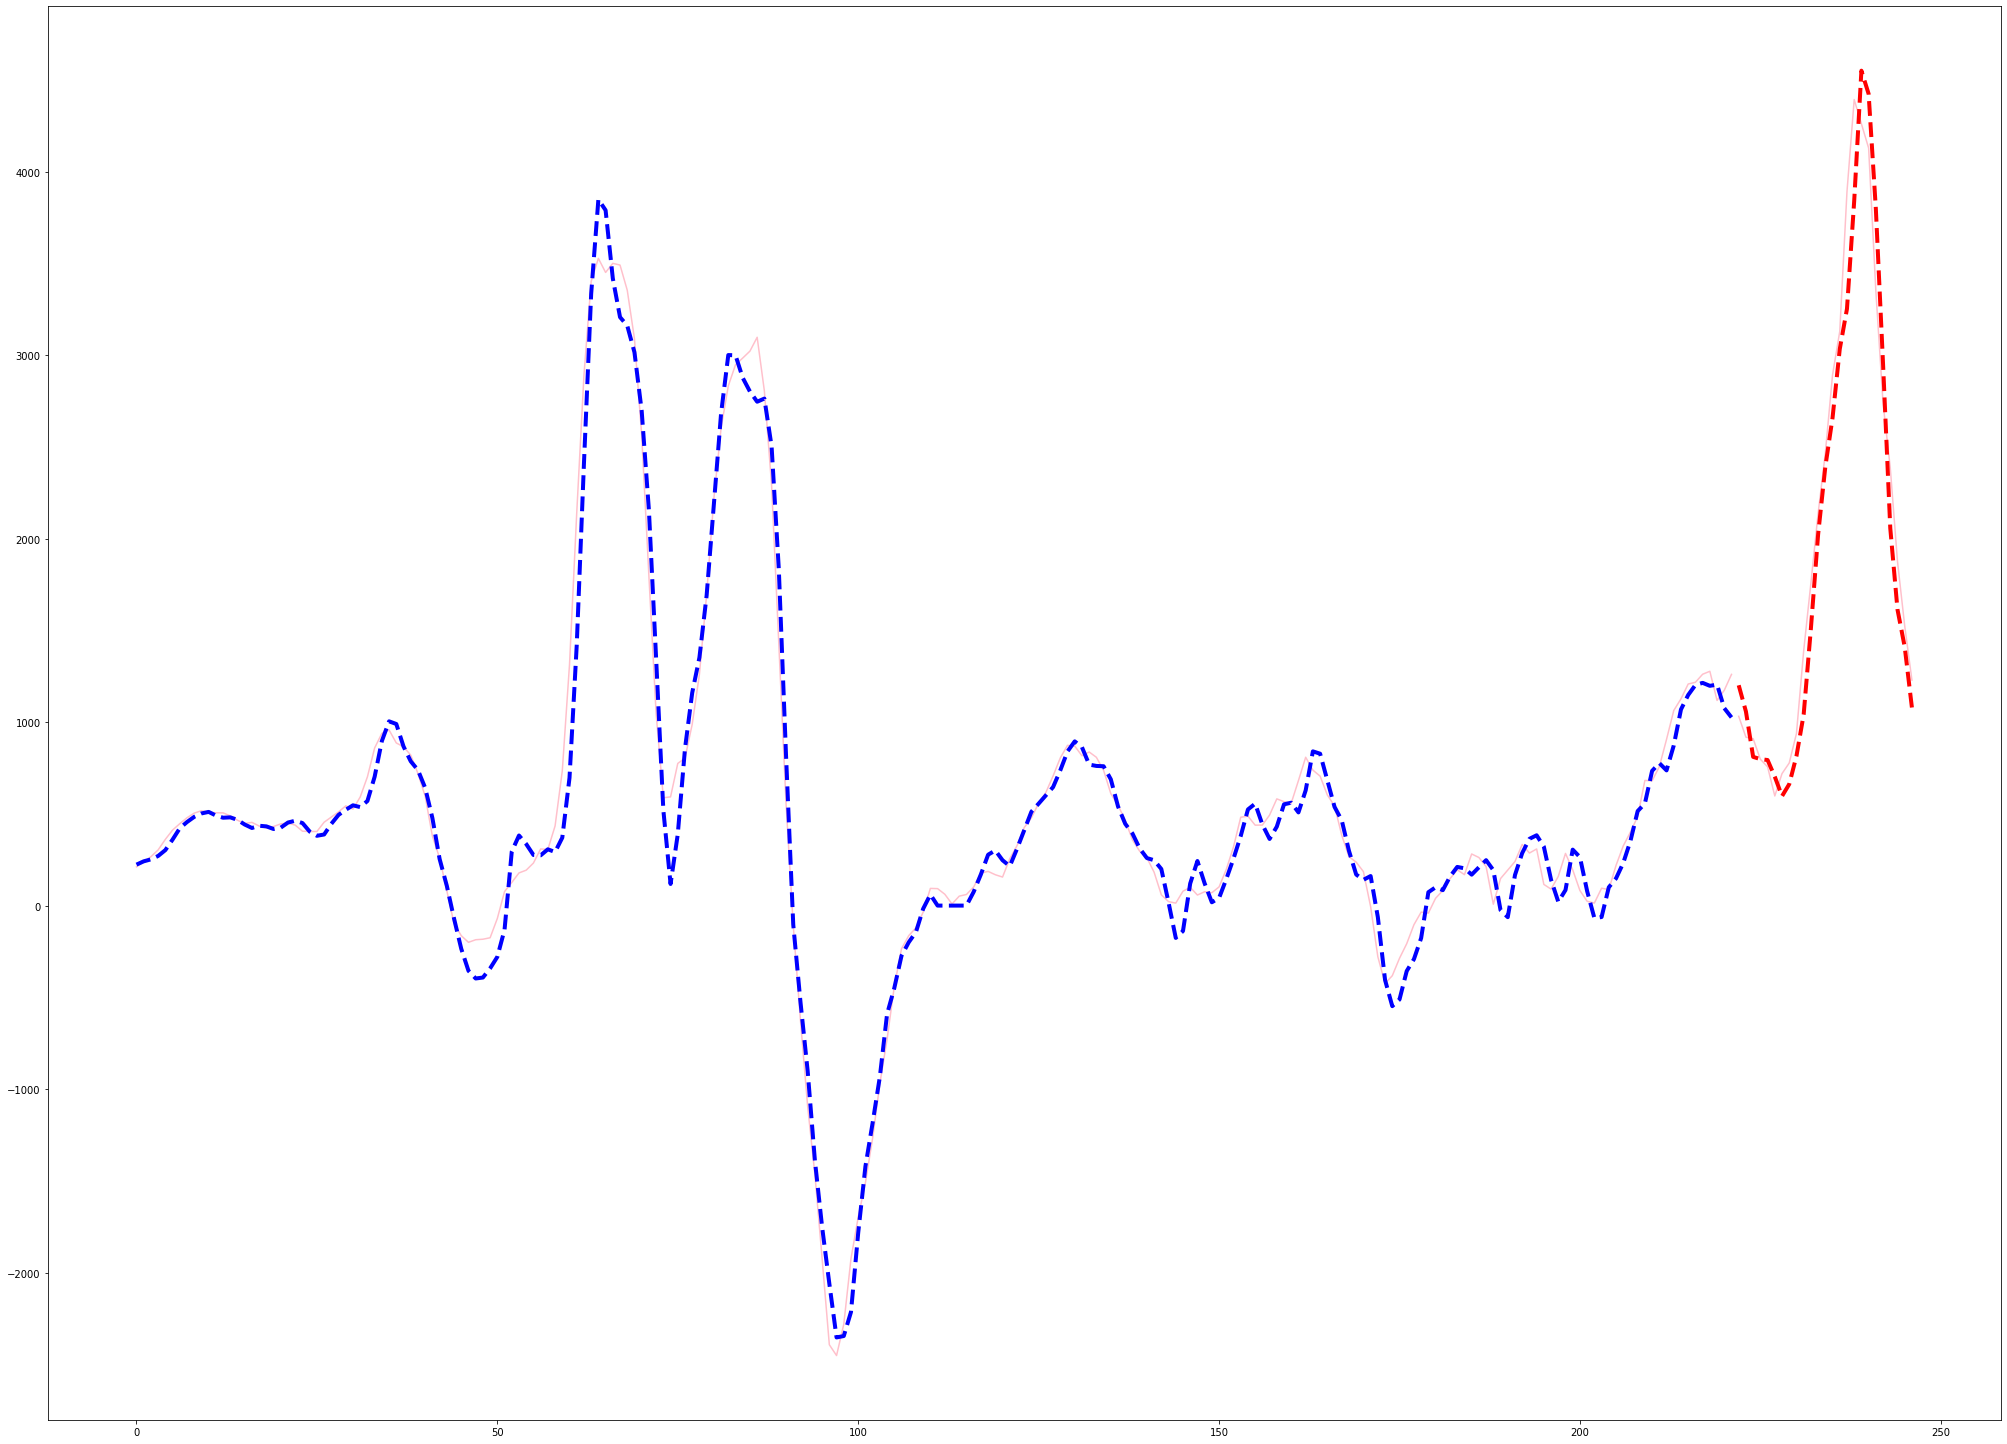

In [235]:
x2 = np.arange(0, int(0.9*len(y)), 1)
x3 = np.arange(int(0.9*len(y)), len(y), 1)

plt.plot(x2, y_train, color='pink')
plt.plot(x2, pred_train, color='blue', linestyle='dashed', linewidth = 4)
plt.plot(x3, y_test, color='pink')
plt.plot(x3, pred_test, color='red', linestyle='dashed', linewidth = 4)

In [247]:
del data[276]
temp = ['t-'+str(i) for i in range(1, 7)] 
temp.extend(['t-11', 't-18','t-19', 't-20'])
forc = pd.DataFrame(columns = temp)
cnt = 0
for i in forc.columns[:7]:
    forc[i] = pd.Series(data[len(data) - cnt])
    cnt += 1
forc['t-11'] = data[len(data)-12]
forc['t-18'] = data[len(data)-19]
forc['t-19'] = data[len(data)-20]
forc['t-20'] = data[len(data)-21]

In [248]:
forc

,t-1,t-2,t-3,t-4,t-5,t-6,t-11,t-18,t-19,t-20
0,847.0,-972.0,1139.0,-2358.0,-1473.0,894.0,4664.0,729.0,102.0,833.0


In [238]:
forecast1 = model.predict(forc)
forecast1

array([[1029.0114]], dtype=float32)

In [239]:
data[276] = 1029
temp = ['t-'+str(i) for i in range(1, 7)] 
temp.extend(['t-11', 't-18','t-19', 't-20'])
forc = pd.DataFrame(columns = temp)
cnt = 0
for i in forc.columns[:7]:
    forc[i] = pd.Series(data[len(data) - cnt])
    cnt += 1
forc['t-11'] = data[len(data)-12]
forc['t-18'] = data[len(data)-19]
forc['t-19'] = data[len(data)-20]
forc['t-20'] = data[len(data)-21]
forecast1 = model.predict(forc)
forecast1

array([[2087.9092]], dtype=float32)

In [258]:
from tensorflow.keras import layers
model1 = Sequential()

model1.add(LSTM(50, recurrent_activation="sigmoid", activation = 'relu', input_shape = (10, 1), return_sequences =  False))
model1.add(layers.Dropout(0.2))
model1.add(Dense(3, activation = 'linear'))
model1.add(Dense(1, activation = 'linear'))

model1.compile(loss = 'mse', optimizer = 'adam', metrics = ['mape'])

nn_mod1 = model1.fit(x_train, y_train, epochs = 200, batch_size = 5)

Epoch 1/200
45/45 [==============================] - 2s 7ms/step - loss: 1014437.6250 - mape: 153.7142
Epoch 2/200
45/45 [==============================] - 0s 7ms/step - loss: 684192.6250 - mape: 153.1664
Epoch 3/200
45/45 [==============================] - 0s 7ms/step - loss: 620885.0000 - mape: 153.5710
Epoch 4/200
45/45 [==============================] - 0s 7ms/step - loss: 733360.8750 - mape: 121.2571
Epoch 5/200
45/45 [==============================] - 0s 6ms/step - loss: 545091.6875 - mape: 103.2689
Epoch 6/200
45/45 [==============================] - 0s 7ms/step - loss: 307346.8750 - mape: 107.9822
Epoch 7/200
45/45 [==============================] - 0s 7ms/step - loss: 319048.6875 - mape: 118.9215
Epoch 8/200
45/45 [==============================] - 0s 7ms/step - loss: 373904.1875 - mape: 87.4588
Epoch 9/200
45/45 [==============================] - 0s 7ms/step - loss: 332261.0312 - mape: 118.1991
Epoch 10/200
45/45 [==============================] - 0s 7ms/step - loss: 362980.0

Epoch 81/200
45/45 [==============================] - 0s 6ms/step - loss: 163982.0469 - mape: 127.6608
Epoch 82/200
45/45 [==============================] - 0s 7ms/step - loss: 139786.8594 - mape: 127.1749
Epoch 83/200
45/45 [==============================] - 0s 7ms/step - loss: 151130.4219 - mape: 96.6504
Epoch 84/200
45/45 [==============================] - 0s 6ms/step - loss: 127413.6562 - mape: 89.6949
Epoch 85/200
45/45 [==============================] - 0s 6ms/step - loss: 97231.0234 - mape: 101.7290
Epoch 86/200
45/45 [==============================] - 0s 7ms/step - loss: 116753.7500 - mape: 94.0769
Epoch 87/200
45/45 [==============================] - 0s 6ms/step - loss: 150816.4062 - mape: 92.1553
Epoch 88/200
45/45 [==============================] - 0s 6ms/step - loss: 101642.5391 - mape: 103.7938
Epoch 89/200
45/45 [==============================] - 0s 7ms/step - loss: 149902.2500 - mape: 99.5910
Epoch 90/200
45/45 [==============================] - 0s 6ms/step - loss: 13352

45/45 [==============================] - 0s 7ms/step - loss: 65969.9297 - mape: 70.9396
Epoch 161/200
45/45 [==============================] - 0s 7ms/step - loss: 85433.1094 - mape: 66.4291
Epoch 162/200
45/45 [==============================] - 0s 6ms/step - loss: 92505.0391 - mape: 68.6641
Epoch 163/200
45/45 [==============================] - 0s 6ms/step - loss: 65229.0703 - mape: 63.2580
Epoch 164/200
45/45 [==============================] - 0s 7ms/step - loss: 161046.4375 - mape: 81.9797
Epoch 165/200
45/45 [==============================] - 0s 6ms/step - loss: 129572.8281 - mape: 68.8310
Epoch 166/200
45/45 [==============================] - 0s 6ms/step - loss: 114837.4609 - mape: 66.4621
Epoch 167/200
45/45 [==============================] - 0s 7ms/step - loss: 112686.2578 - mape: 68.1317
Epoch 168/200
45/45 [==============================] - 0s 7ms/step - loss: 111242.4766 - mape: 73.8503
Epoch 169/200
45/45 [==============================] - 0s 7ms/step - loss: 141276.5781 - ma

In [259]:
err = model1.evaluate(x_test, y_test)
err[1]

1/1 [==============================] - 0s 381ms/step - loss: 304602.0000 - mape: 28.7210


28.721006393432617

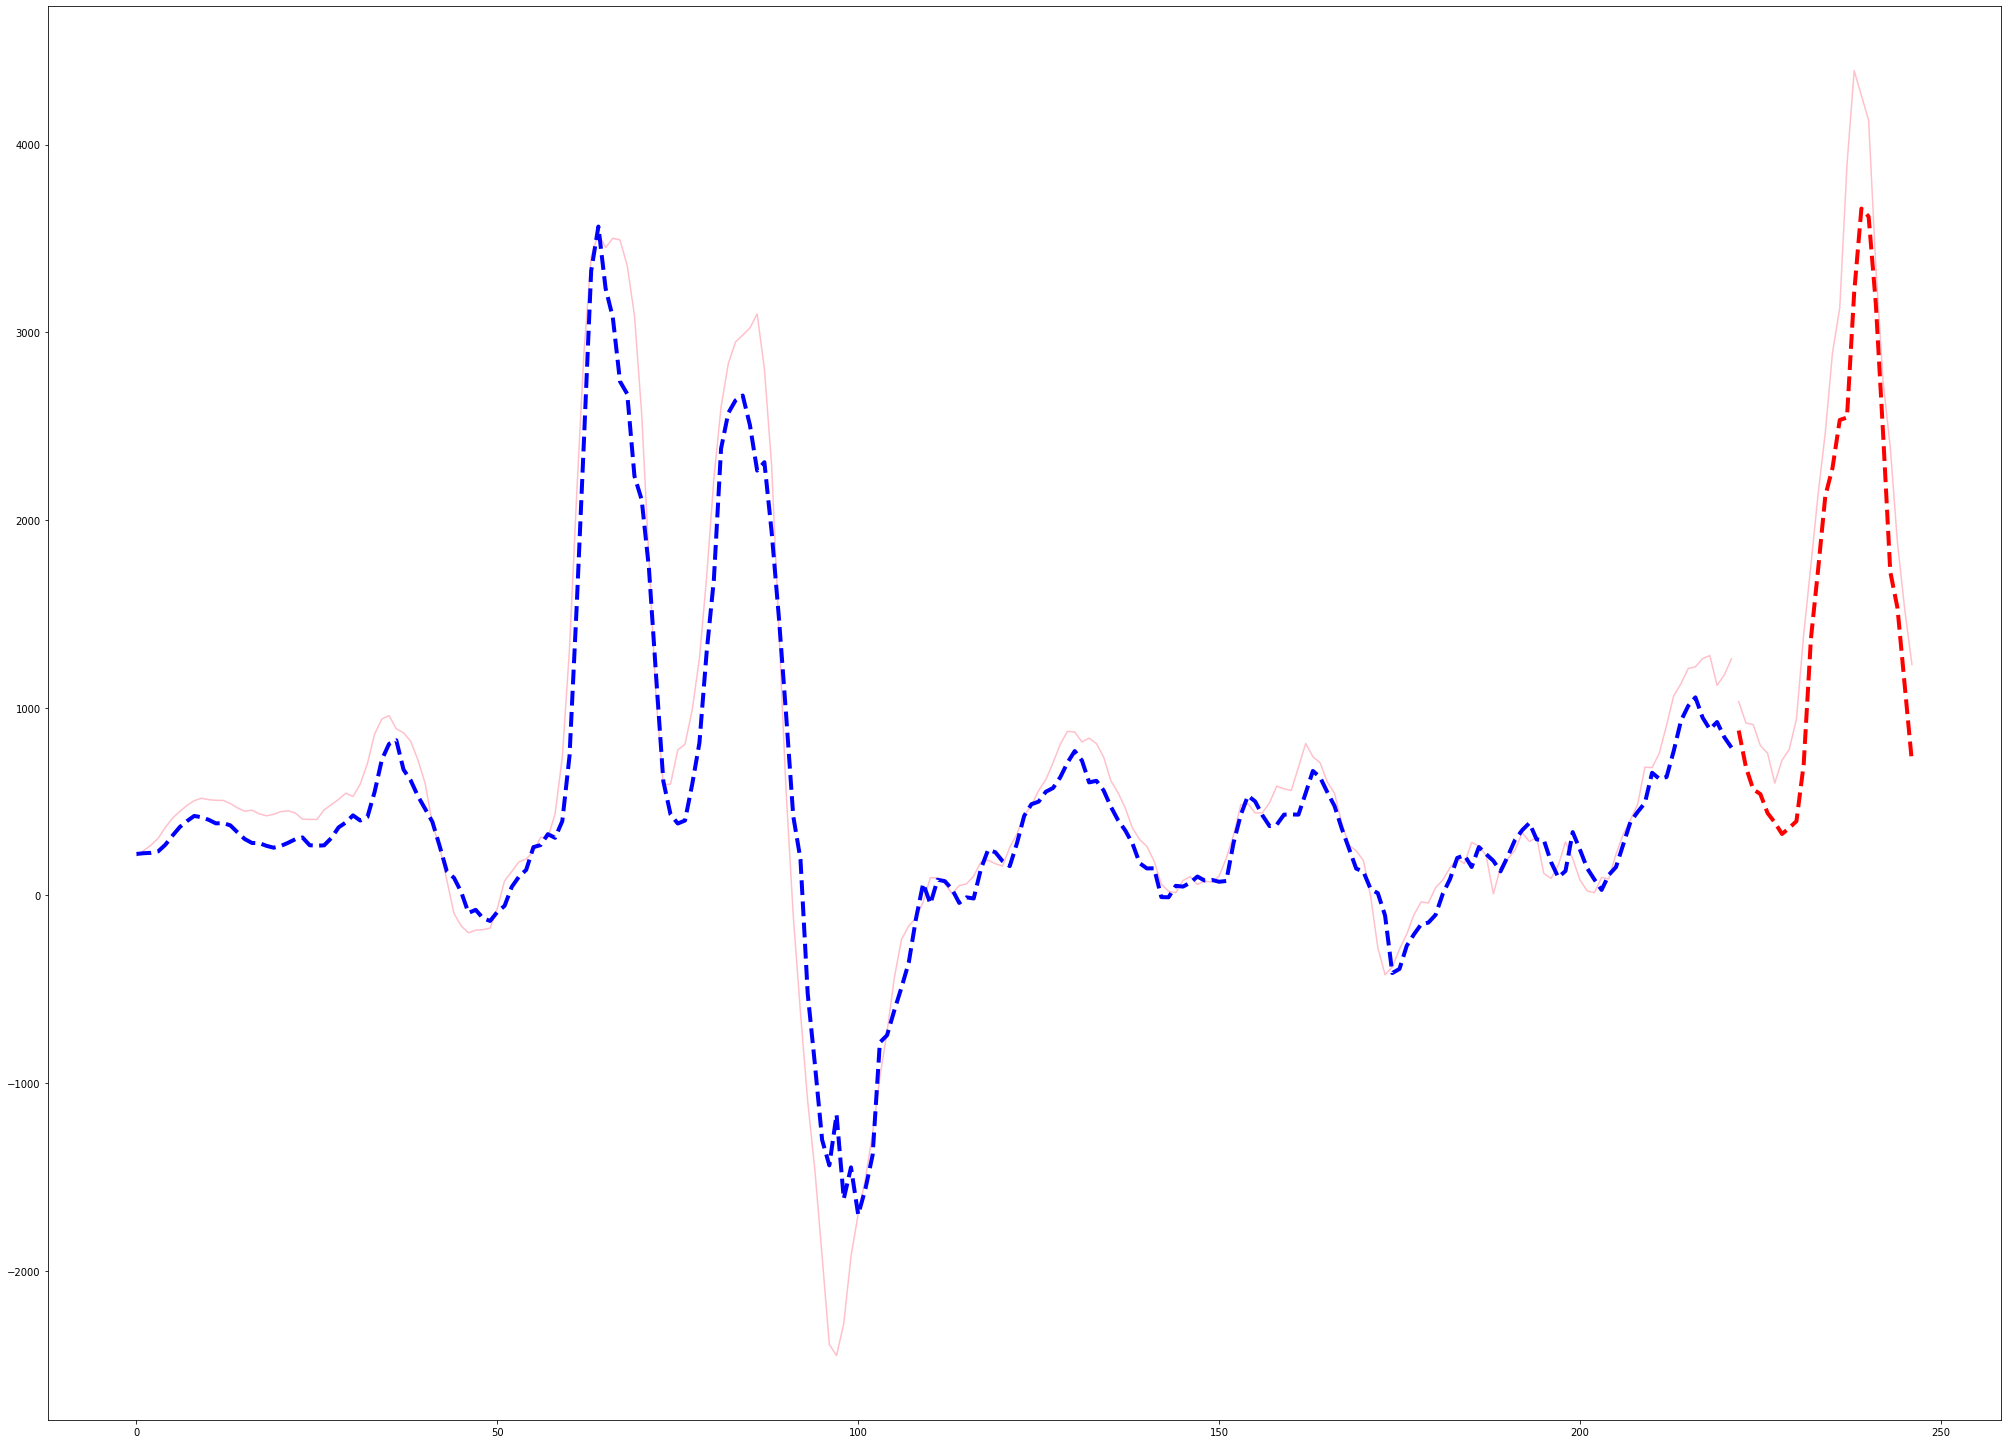

In [260]:
pred_train = model1.predict(x_train)
pred_test = model1.predict(x_test)

x2 = np.arange(0, int(0.9*len(y)), 1)
x3 = np.arange(int(0.9*len(y)), len(y), 1)

plt.plot(x2, y_train, color='pink')
plt.plot(x2, pred_train, color='blue', linestyle='dashed', linewidth = 4)
plt.plot(x3, y_test, color='pink')
plt.plot(x3, pred_test, color='red', linestyle='dashed', linewidth = 4)

In [261]:
forecast2 = model1.predict(forc)
forecast2

array([[442.79865]], dtype=float32)

In [262]:
data[276] = 443
temp = ['t-'+str(i) for i in range(1, 7)] 
temp.extend(['t-11', 't-18','t-19', 't-20'])
forc = pd.DataFrame(columns = temp)
cnt = 0
for i in forc.columns[:7]:
    forc[i] = pd.Series(data[len(data) - cnt])
    cnt += 1
forc['t-11'] = data[len(data)-12]
forc['t-18'] = data[len(data)-19]
forc['t-19'] = data[len(data)-20]
forc['t-20'] = data[len(data)-21]
forecast3 = model.predict(forc)
forecast3

array([[759.565]], dtype=float32)